In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. بارگذاری داده
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2. تقسیم به train و test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

Accuracy: 0.933


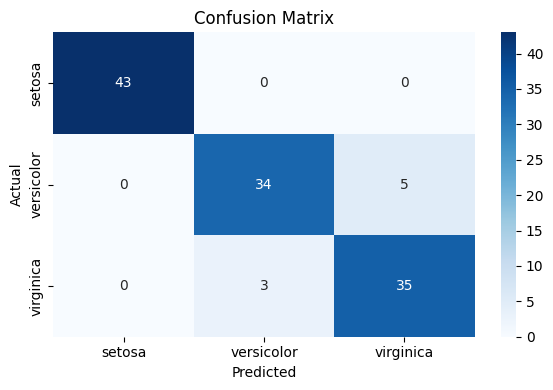

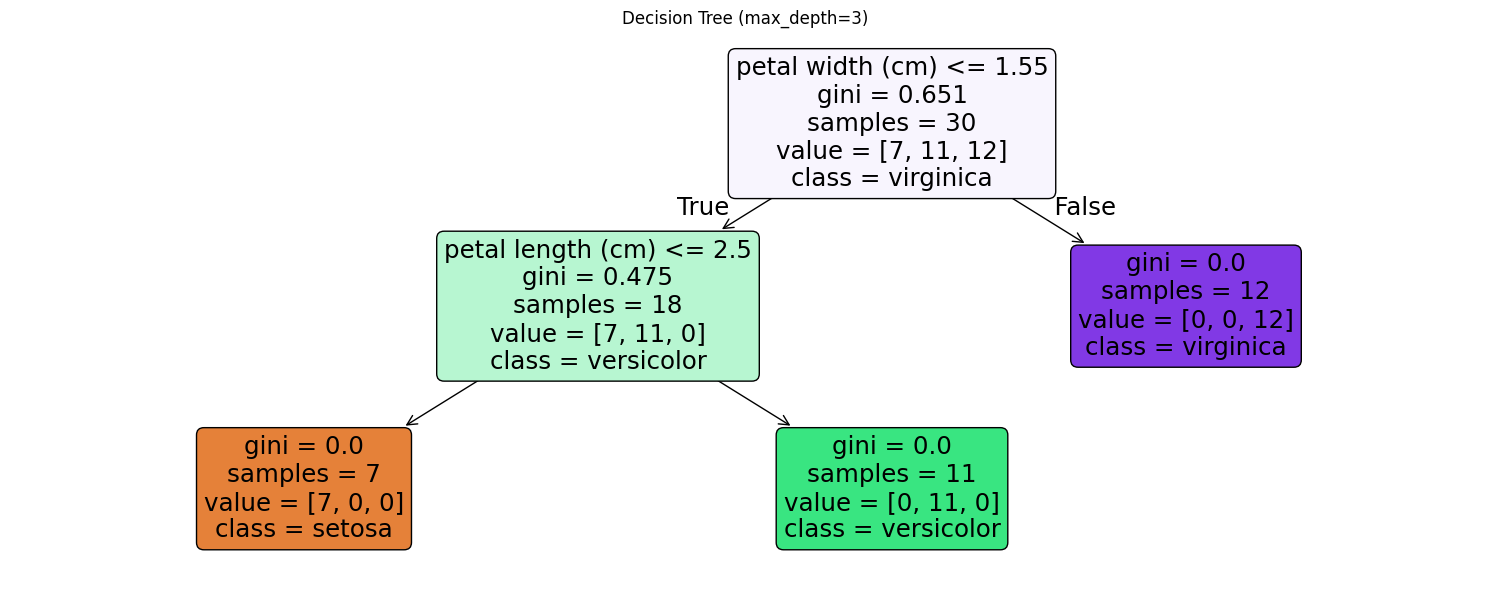

In [3]:
# 3. ساخت مدل با max_depth محدود (برای کنترل overfitting)
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)

# 4. ارزیابی دقت
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# 5. رسم ماتریس درهم‌ریختگی
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 6. رسم ساختار درخت
plt.figure(figsize=(15, 6))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree (max_depth=3)")
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ساخت داده
np.random.seed(42)

n = 30
heights = np.random.normal(loc=150, scale=20, size=n)
weights = np.random.normal(loc=50, scale=10, size=n)

# برچسب گذاری بر اساس قانون ساده
# اگر قد > 170 → بزرگسال
# اگر 150 < قد ≤ 170 → نوجوان
# اگر قد ≤ 150 → کودک

labels = []
for h in heights:
    if h > 170:
        labels.append('adult')
    elif h > 150:
        labels.append('teen')
    else:
        labels.append('child')

df = pd.DataFrame({
    'height': heights,
    'weight': weights,
    'label': labels
})
df.head()

,height,weight,label
0,159.934283,43.982934,teen
1,147.234714,68.522782,child
2,162.953771,49.865028,teen
3,180.460597,39.422891,adult
4,145.316933,58.225449,child


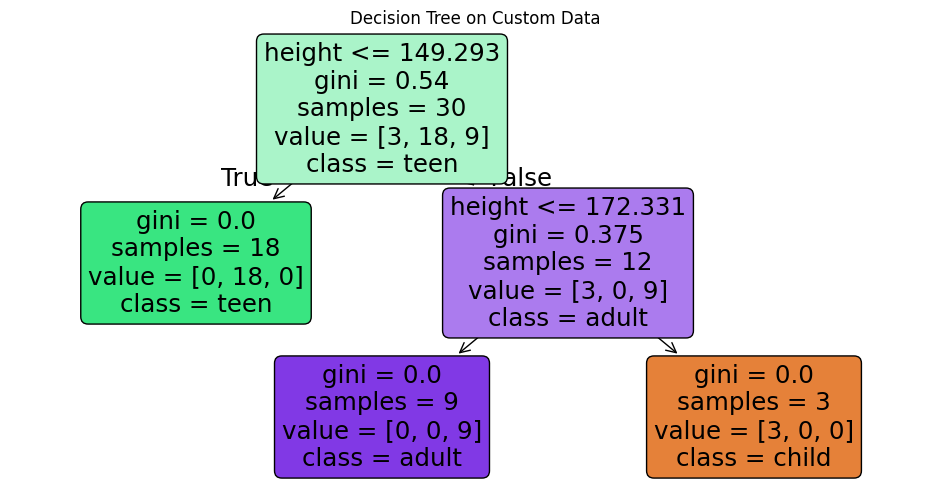

In [5]:
from sklearn.preprocessing import LabelEncoder

# آماده‌سازی داده
X = df[['height', 'weight']].values
y = LabelEncoder().fit_transform(df['label'])  # label → عددی

# آموزش درخت
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X, y)

# رسم درخت تصمیم
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['height', 'weight'],
          class_names=['child', 'teen', 'adult'],
          filled=True, rounded=True)
plt.title("Decision Tree on Custom Data")
plt.show()


In [6]:
# ساخت داده
np.random.seed(42)
n = 500000

# ویژگی‌ها با نویز
heights = np.random.normal(loc=150, scale=20, size=n)
true_weights = np.random.normal(loc=50, scale=10, size=n)
noise = np.random.normal(loc=0, scale=5, size=n)
weights = true_weights + noise

# برچسب‌گذاری
labels = []
for h in heights:
    if h > 170:
        labels.append('adult')
    elif h > 150:
        labels.append('teen')
    else:
        labels.append('child')

# ضربان قلب براساس کلاس
heartrate = []
for label in labels:
    if label == 'child':
        heartrate.append(np.random.normal(100, 5))
    elif label == 'teen':
        heartrate.append(np.random.normal(85, 5))
    else:
        heartrate.append(np.random.normal(70, 5))

# ساخت دیتافریم
df = pd.DataFrame({
    'height': heights,
    'weight': weights,
    'heartrate': heartrate,
    'label': labels
})

df.head()


,height,weight,heartrate,label
0,159.934283,40.215611,84.309591,teen
1,147.234714,41.189955,100.235486,child
2,162.953771,62.615426,82.046708,teen
3,180.460597,55.179421,71.432343,adult
4,145.316933,58.547636,87.674392,child


Accuracy: 0.933


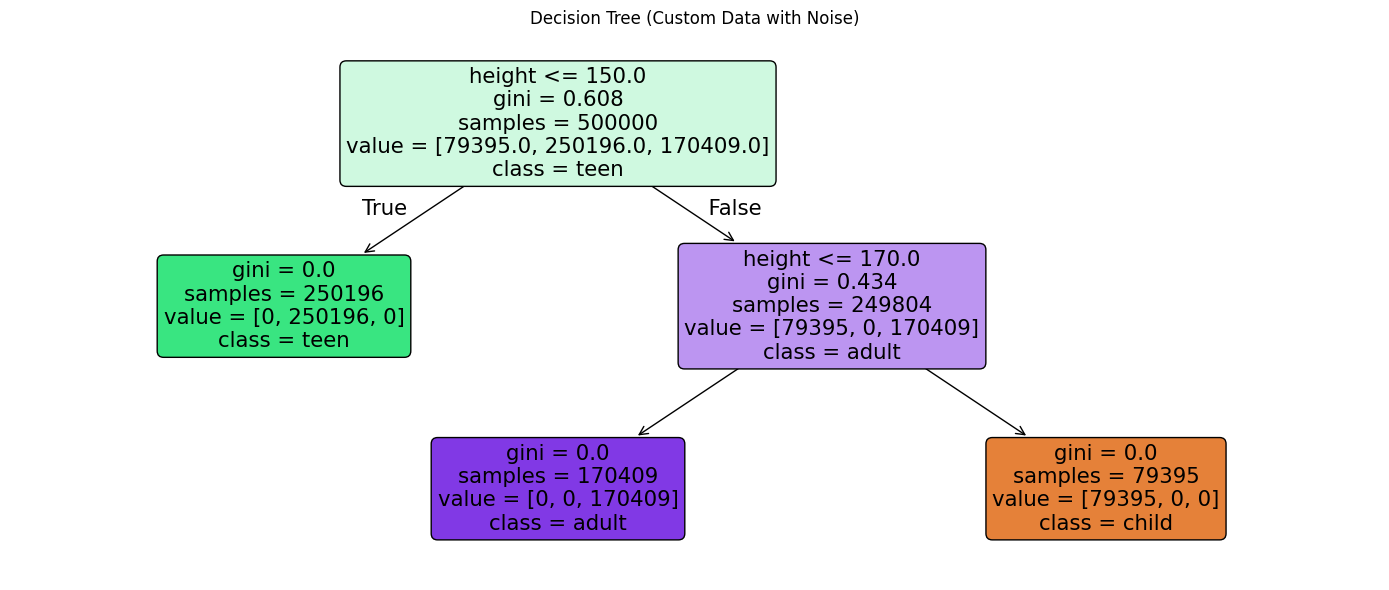

In [7]:
# آماده‌سازی ورودی برای مدل
X = df[['height', 'weight', 'heartrate']].values
y = LabelEncoder().fit_transform(df['label'])

# مدل درخت تصمیم با عمق محدود برای سادگی
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X, y)


# محاسبه دقت
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# نمایش درخت
plt.figure(figsize=(14, 6))
plot_tree(model, 
          feature_names=['height', 'weight', 'heartrate'],
          class_names=['child', 'teen', 'adult'],
          filled=True, 
          rounded=True)
plt.title("Decision Tree (Custom Data with Noise)")
plt.tight_layout()
plt.show()



Accuracy: 0.765


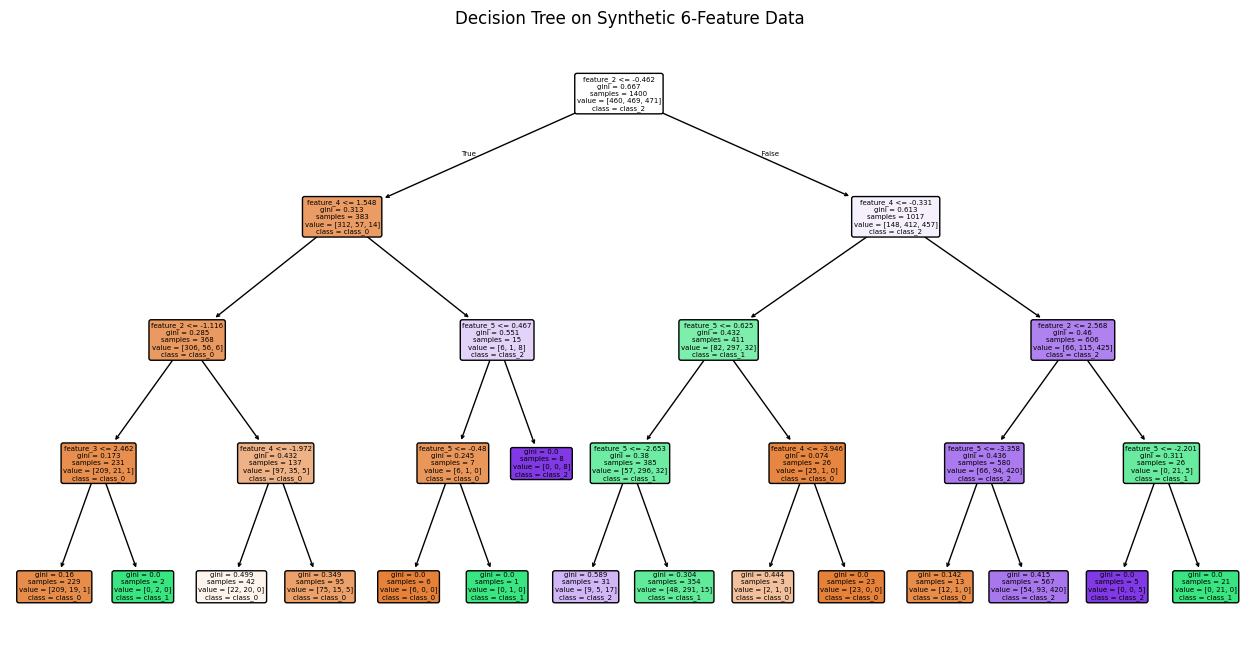

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)

# ساخت داده با 6 ویژگی و 3 کلاس
X, y = make_classification(
    n_samples=2000,      # تعداد نمونه
    n_features=6,       # تعداد ویژگی
    n_informative=4,    # تعداد ویژگی‌های مؤثر
    n_redundant=0,      # ویژگی‌های افزوده‌شده (بدون افزوده)
    n_classes=3,        # تعداد کلاس‌ها
    n_clusters_per_class=1,
    random_state=42
)

# افزودن نویز نرمال به داده‌ها
noise = np.random.normal(0, 0.5, X.shape)  # نویز با میانگین 0 و انحراف 0.5
X_noisy = X + noise

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# آموزش درخت تصمیم
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X_train, y_train)

# پیش‌بینی و ارزیابی
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# رسم درخت
plt.figure(figsize=(16,8))
plot_tree(model, filled=True, rounded=True,
          feature_names=[f'feature_{i}' for i in range(6)],
          class_names=[f'class_{i}' for i in range(3)])
plt.title("Decision Tree on Synthetic 6-Feature Data")
plt.show()
